In [1]:
import numpy as np
import scipy
import scipy.linalg  
import matplotlib.pyplot as plt
%matplotlib inline

1. Решите линейную систему уравнений
## $\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9\end{array}
\right)\cdot \left(
\begin{array}{cccc}
X\end{array}
\right) = \left(\begin{array}{cccc}
12\\2\\1\end{array}\right)
$

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
print(A)
B = np.array([12, 2, 1])
print(B)
np.linalg.solve(A, B)

[[1 2 3]
 [4 0 6]
 [7 8 9]]
[12  2  1]


array([-9.2       ,  0.9       ,  6.46666667])

2. Найдите псевдорешение:
## $x + 2y - z = 1$
## $3x - 4y = 7$
## $8x - 5y + 2z = 12$
## $2x - 5z = 7$
## $11x + 4y - 7z = 15$

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond = None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [4]:
X = np.dot(A, [ 1.13919353, -0.90498444, -0.9009803 ]) - B
print(X)
print(np.linalg.norm(X))

[-0.76979505  0.03751835 -0.16349016 -0.21671144  0.21805317]
0.8457139653464247


3. Сколько решений имеет линейная система:
## $\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\end{array}
\right)\cdot \left(
\begin{array}{cccc}
X\end{array}
\right) = \left(\begin{array}{cccc}
12\\2\\1\end{array}\right)
$

Если ноль - то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
C = np.array([[1, 2, 3, 12], [4, 5, 6, 2], [7, 8, 9, 1]])
print(np.linalg.matrix_rank(A, 0.0001))
print(np.linalg.matrix_rank(C, 0.0001))
print(np.linalg.solve(A, B))

2
3
[ 2.83726777e+16 -5.67453553e+16  2.83726777e+16]


In [6]:
B_new = np.array([4, 3, 2])
C_new = np.array([[1, 2, 3, 4], [4, 5, 6, 3], [7, 8, 9, 2]])
print(np.linalg.matrix_rank(C_new, 0.0001))
print(np.linalg.solve(A, B_new))

2
[ 0.53333333 -6.06666667  5.2       ]


4. Вычислите LU-разложнеие матрицы:  
$
\begin{pmatrix}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73
\end{pmatrix}
$  
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей

In [7]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
print(f'Определитель матрицы А равен {np.linalg.det(A)}')

P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

Определитель матрицы А равен 432.00000000000017
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [8]:
print(np.dot(P.transpose(), A))
print(np.dot(L, U))
print(np.dot(P.transpose(), A) - np.dot(L, U))

[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]
[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
B = np.array([5, 4, 13])
answer = np.linalg.solve(A, B)
answer

array([ 5.95833333, -0.60416667,  0.08333333])

In [10]:
np.linalg.norm(np.dot(A, answer) - B)

0.0

5. Найдите нормальное псевдорешение неопределенной системы:
## $x + 2y - z = 1$
## $8x - 5y + 2z = 12$  
Для этого определите функцию Q(x, y, z), равную норме решения, и найдите ее минимум.

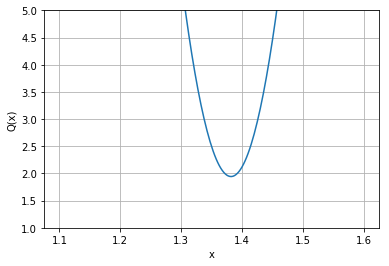

In [11]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

#Вывел y и z из уравнений через х и подставил в функцию Q
x = np.linspace(1.1, 1.6, 201)
plt.plot(x, Q(x, 10 * x - 14, 21 * x -29))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid(True)
plt.ylim(1, 5)
plt.show()

При х равном приблизительно 1,375 функция Q(x) минимальна

In [12]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 2])
np.linalg.lstsq(A, B, rcond=None)

(array([ 0.42250923,  0.22509225, -0.12730627]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [40]:
np.dot(A, [ 1.38191882, -0.18081181,  0.0202952 ])

array([ 1.        , 12.00000001])

6. Найдите одно из псевдорешений вырожденной системы:
## $\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\end{array}
\right)\cdot \left(
\begin{array}{cccc}
X\end{array}
\right) = \left(\begin{array}{cccc}
2\\5\\11\end{array}\right)
$  
Попробуйте также отыскать и нормальное пседорещение.

In [41]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
C = np.array([[1, 2, 3, 2], [4, 5, 6, 5], [7, 8, 9, 11]])
print(np.linalg.matrix_rank(A, 0.0001))
print(np.linalg.matrix_rank(C, 0.0001))

2
3


In [42]:
Q, R = np.linalg.qr(A)
print(f'матрица Q:\n{Q}\n матрица R:\n{R}\n {np.dot(Q, R)}')


матрица Q:
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
 матрица R:
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [43]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [44]:
B1 = np.dot(np.transpose(Q), B)[: 2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [45]:
X1 = np.linalg.solve(R1, B1)
print(X1)
X = np.append(X1, 0)
print(X)
np.linalg.norm(X), np.linalg.norm(np.dot(A, X) - B)

[1.50000000e+00 9.32822279e-15]
[1.50000000e+00 9.32822279e-15 0.00000000e+00]


(1.4999999999999896, 1.2247448713915894)

In [46]:
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))

In [47]:
X = [1.25, 0.5, -0.25]
np.linalg.norm(X), np.linalg.norm(np.dot(A, X) - B)

(1.3693063937629153, 1.224744871391589)